In [ ]:
#Week 5
#Decision Tree Classifier
#SID: 2305603

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score


Rows Columns
(887, 8)
   Passenger Class  Female  Male   Age  Siblings/Spouses Aboard  \
0                3       0     1  22.0                        1   
1                1       1     0  38.0                        1   
2                3       1     0  26.0                        0   
3                1       1     0  35.0                        1   
4                3       0     1  35.0                        0   

   Parents/Children Aboard     Fare  Survived  
0                        0   7.2500         0  
1                        0  71.2833         1  
2                        0   7.9250         1  
3                        0  53.1000         1  
4                        0   8.0500         0  

 Survived
0    545
1    342
Name: count, dtype: int64


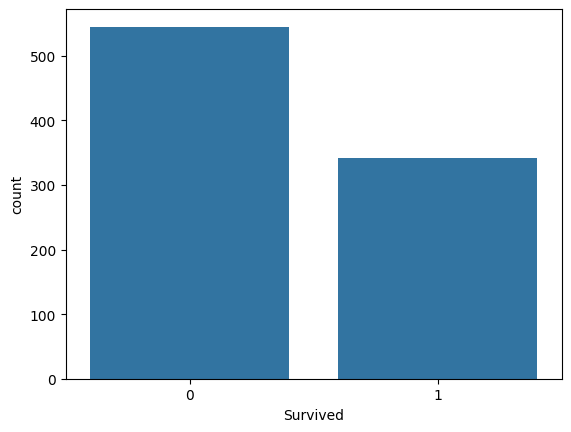

In [9]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("data/titanic.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

pd.set_option('display.max_columns', None) #optional setting to show all feature columns

#Third, display first five rows to check data
print(data.head(5))

#Select last column (assuming the last column is the class)
last_column = data.iloc[:, -1] #using iloc to select the last column

#Count occurences of 0's and 1's
value_counts = last_column.value_counts()

#Print the value counts and check for imbalance
print('\n' , value_counts)

sns.countplot(x="Survived", data=data)
plt.show()

Axes(0.125,0.11;0.62x0.77)


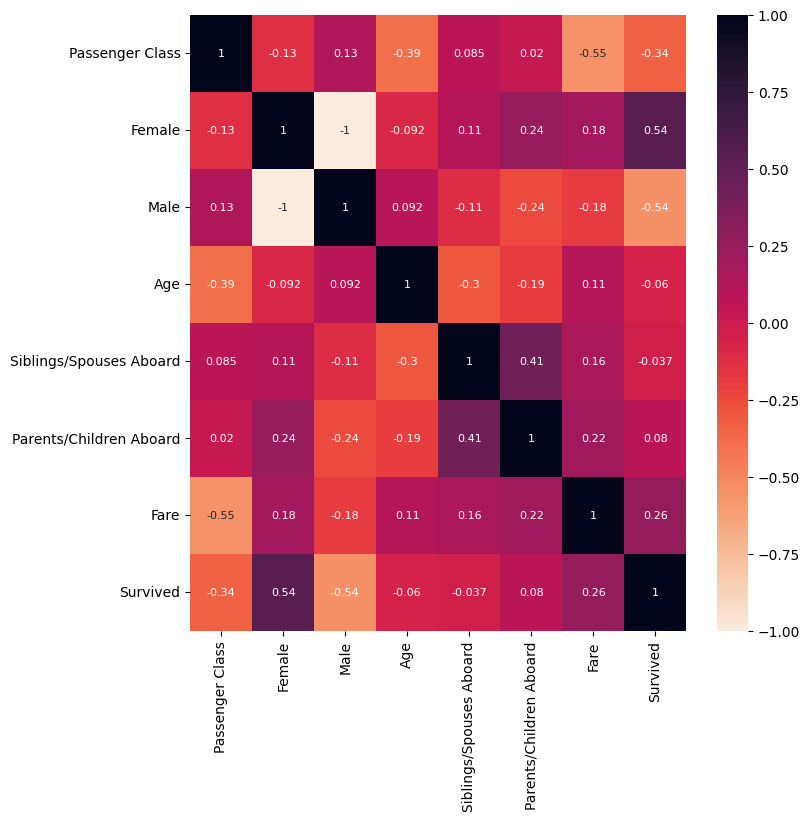

In [8]:
#Display Feature Relations of Data Set
plt.figure(figsize=(8,8)) #Adjust width and height
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":8}, cmap= sns.cm.rocket_r))

In [10]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['Survived'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['Survived'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testing. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [11]:
#Create and Test the Model

#First, declare a new model
classifier_model = DecisionTreeClassifier()

#Second, Train (fit) the model from the training data
classifier_model.fit(X_train, y_train)

#Fourth, Test the model using the testing data
y_pred = classifier_model.predict(X_test)
print('\nTest Data Model = ', y_pred)


Test Data Model =  [1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 0 0 1 0 1]



Confusion Matrix = 
 [[137  25]
 [ 26  79]]

Accuracy =  0.8089887640449438

Precision =  0.7596153846153846

Recall =  0.7523809523809524

F1 Score =  0.7559808612440191


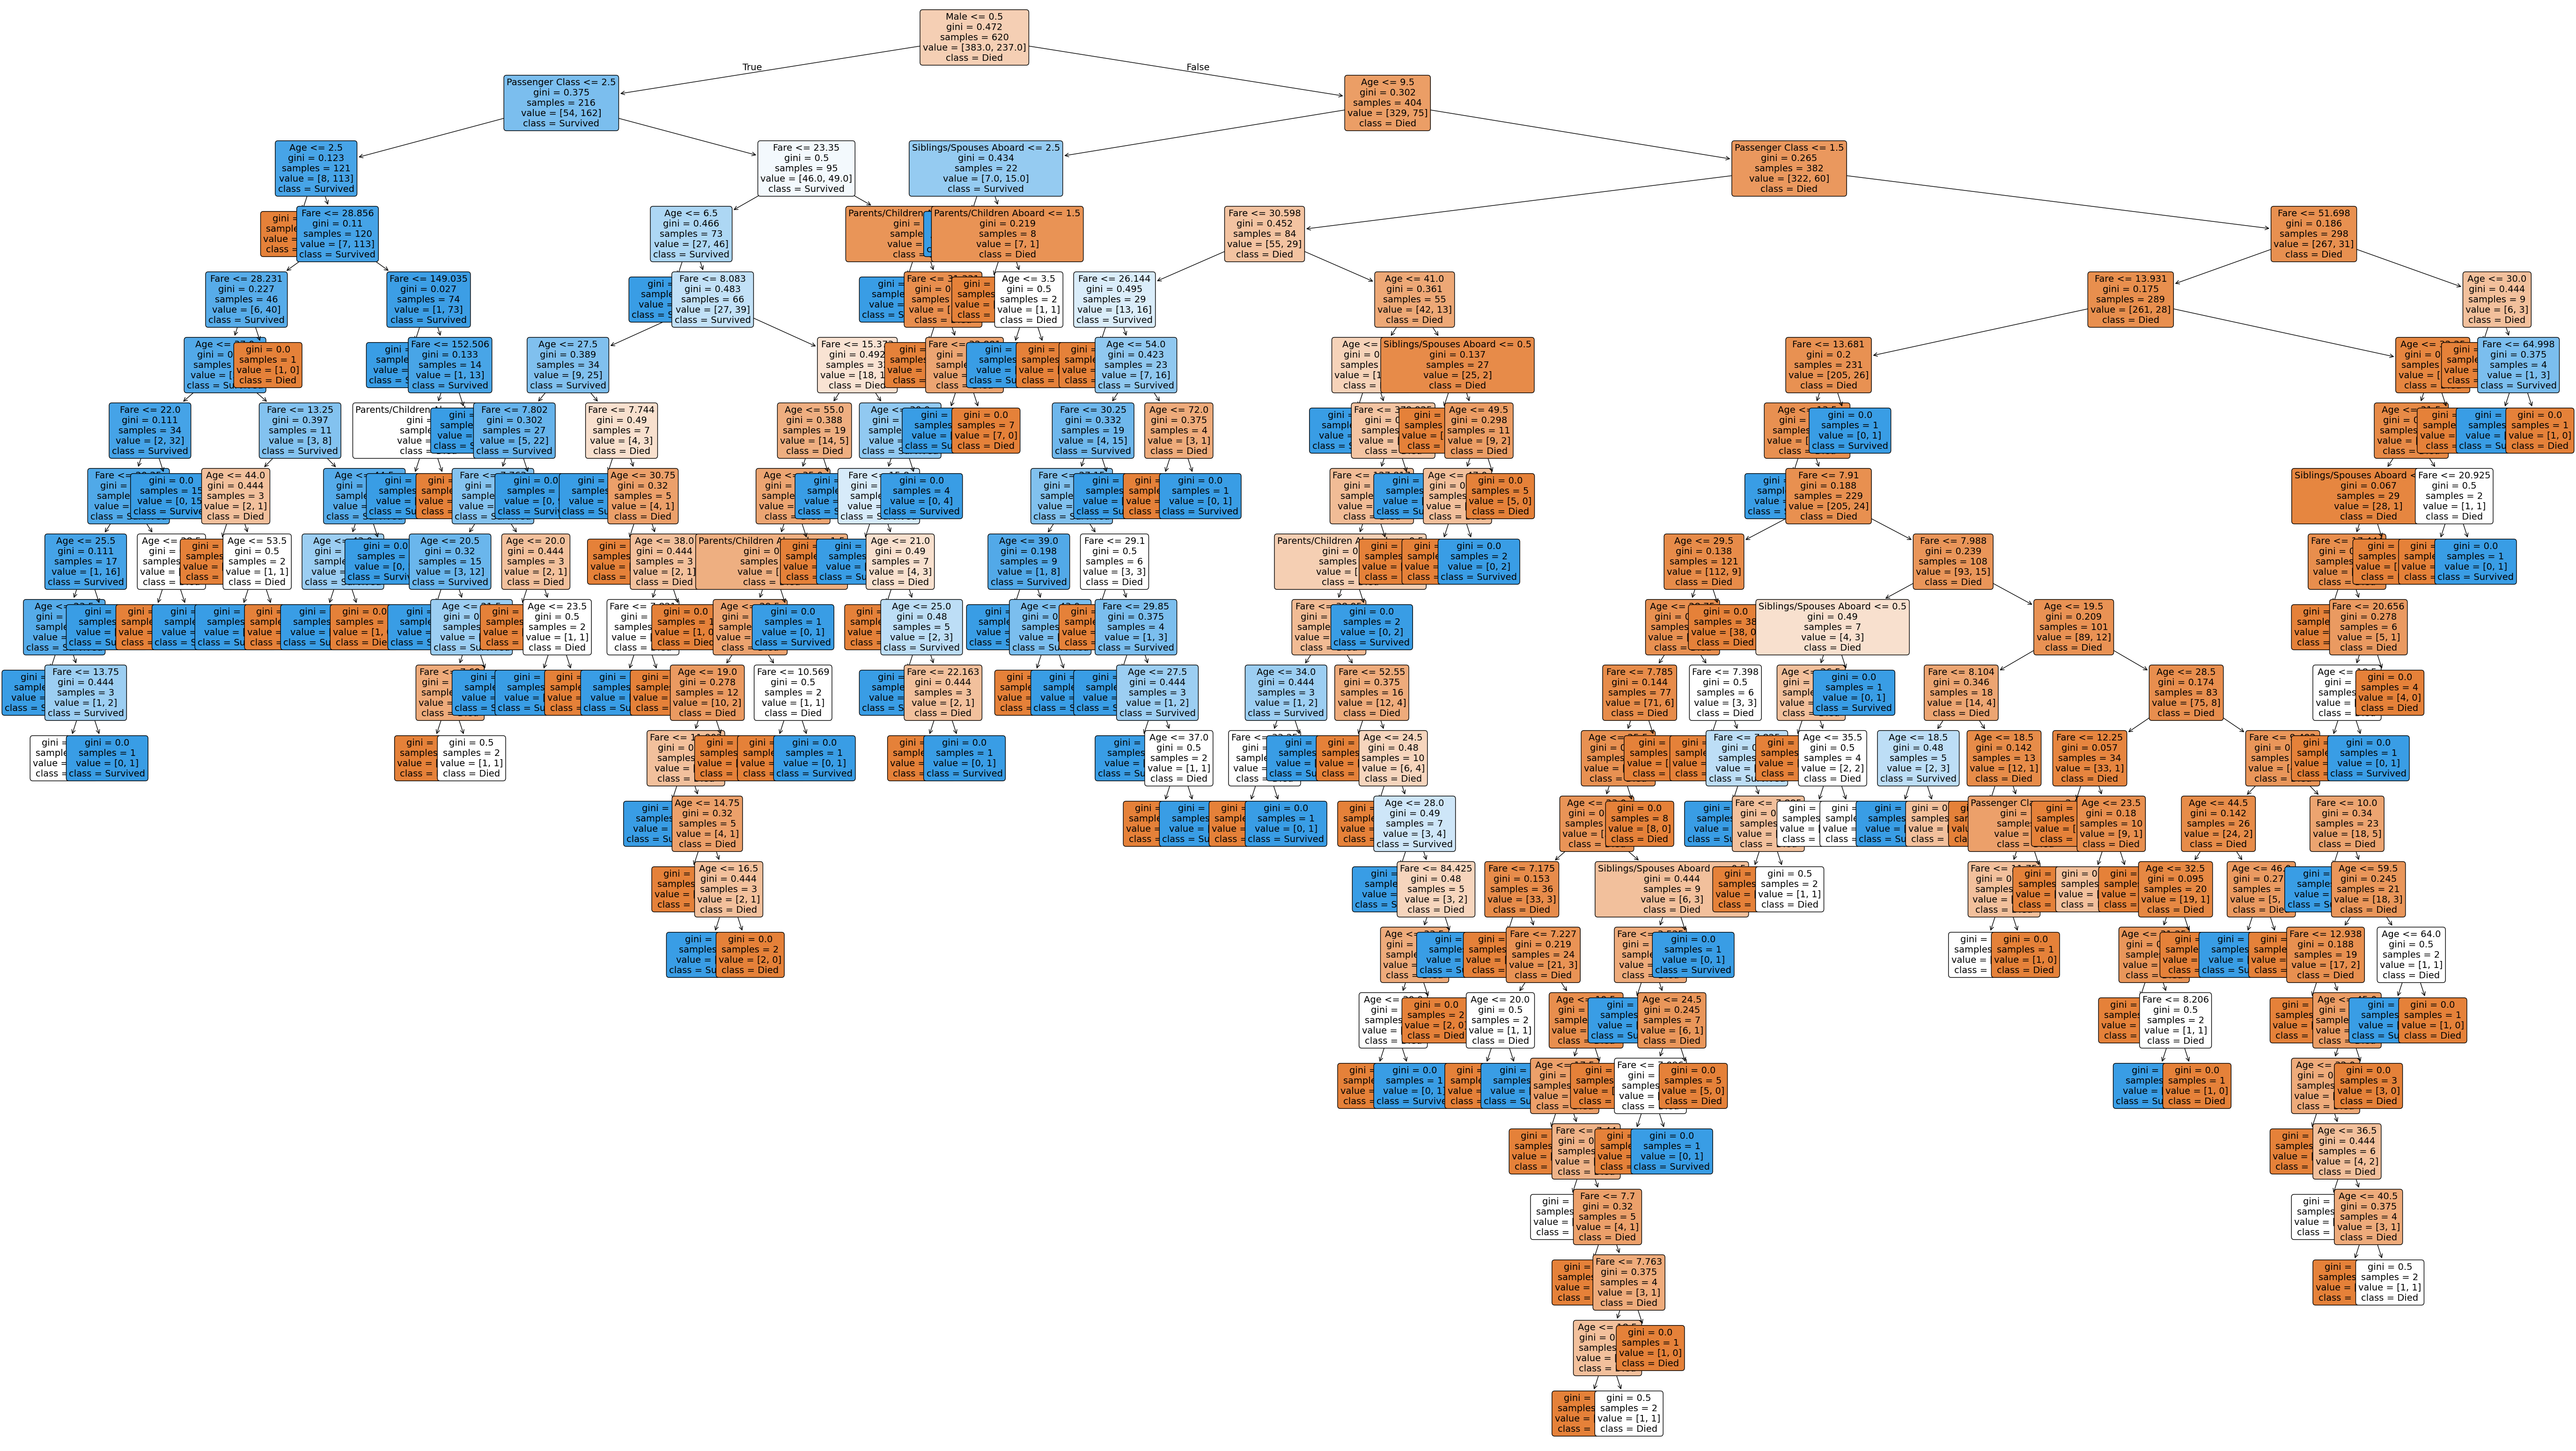

In [14]:
#Evaluate Model
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))

#Print out shape of tree
from sklearn.tree import _tree, plot_tree
plt.figure('Decision Tree', figsize=(70,40))
plot_tree(classifier_model, filled=True, rounded=True, fontsize=14, feature_names=data.columns, class_names=['Died','Survived'])
plt.show()

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.768 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.840 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.831 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.768 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.825 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.841 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.763 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.840 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=2

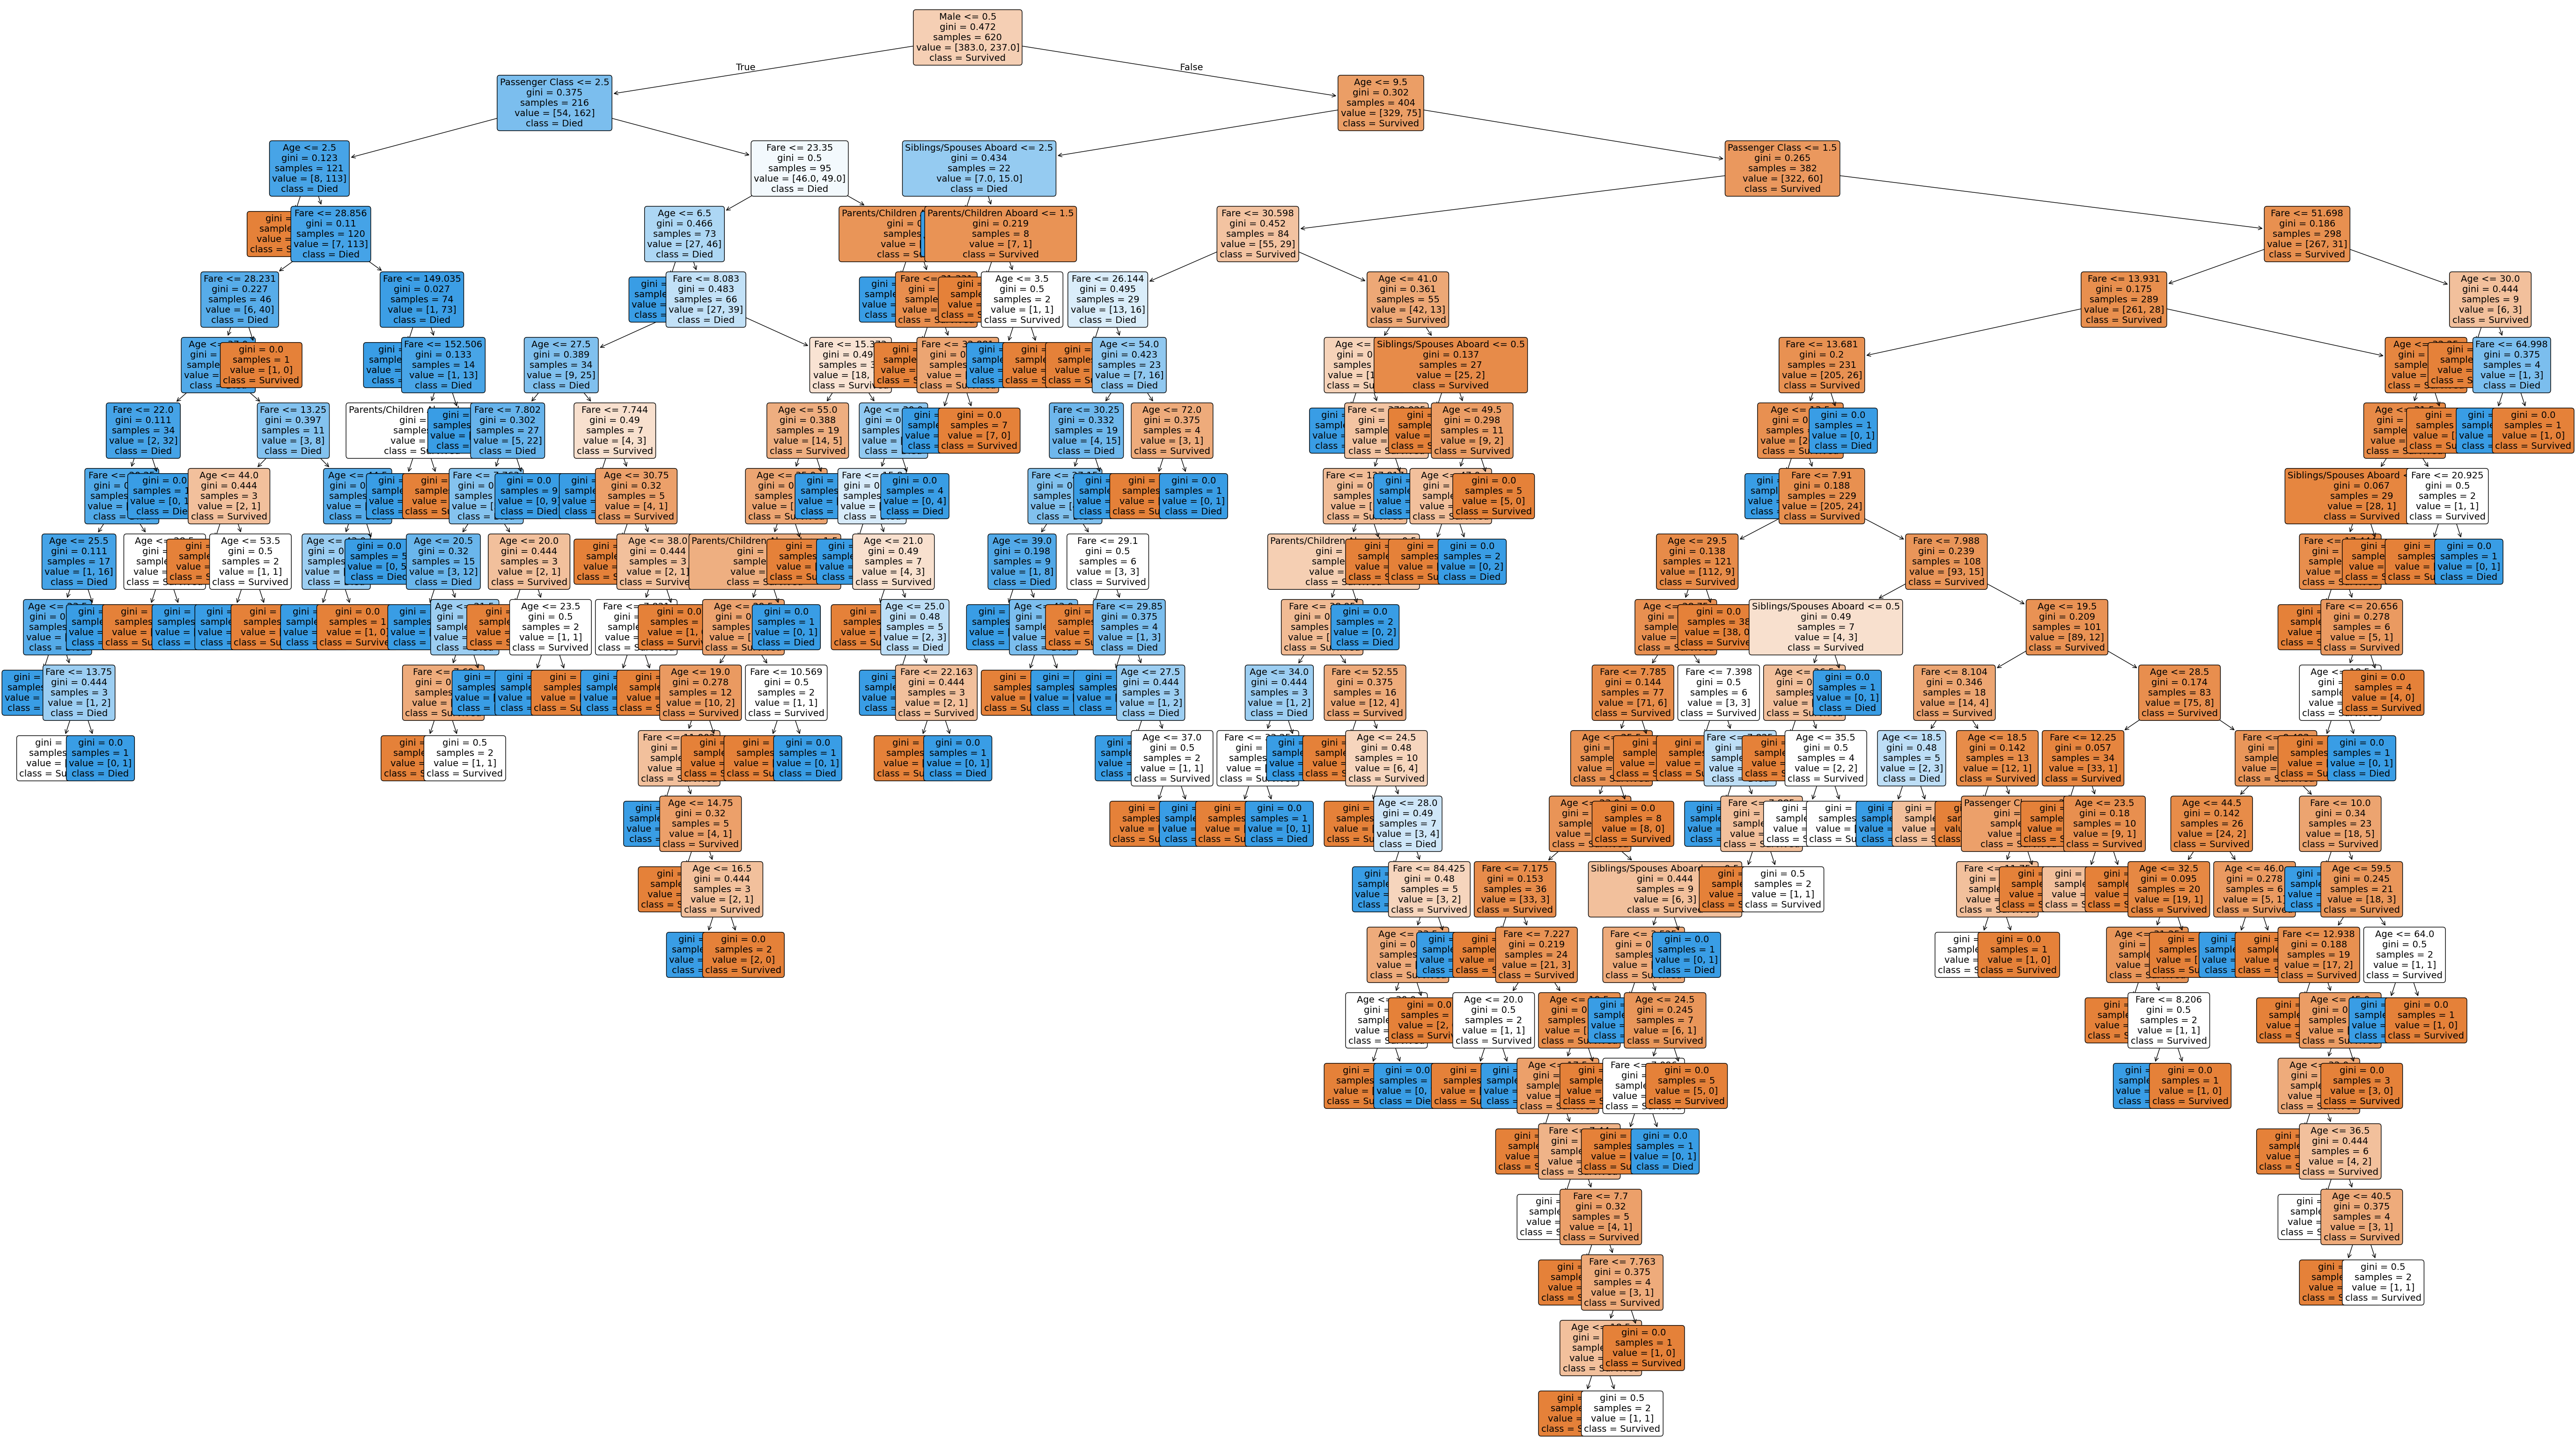

In [ ]:
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid,verbose=3, cv=3) #'Verbose' = Added information in Grid Search. 1 = Little, 2 = Average, 3 = Full info
grid.fit(X_train, y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)

#Evaluate Model
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))

#Print out shape of tree
from sklearn.tree import _tree, plot_tree
plt.figure('Decision Tree', figsize=(70,40))
plot_tree(classifier_model, filled=True, rounded=True, fontsize=14, feature_names=data.columns, class_names=['Survived','Died'])
plt.show()